# CSC-104 Spring 2021: Suplementary problems for Assignment 8

An important part of the business of Statistics is to generalize conclusions obtained from a sample to the whole population it was taken from. For example, one might be interested in estimating a population parameter (like a mean or proportion) by looking at a sample statistic. The problem with this approach is that if we take a second sample from the same population we will almost surely get a different estimate. Thus it is important to understand how these estimates vary from sample to sample. To this end, sampling distributions play an important role.

In this assignment you will construct a few sampling distributions for means (and later for other statistics) and appreciate some interesting properties.

### Your first ever sampling distribution for a mean

Consider the process of rolling two six-sided dice with faces marked 1, 2, 3, 4, 5, 6.

<figure>
<center>
<img src='https://cdn.pixabay.com/photo/2012/02/28/10/23/dice-18208_1280.jpg' width="320">
<figcaption>Figure 1. Two six-side dice.</figcaption></center>
</figure>

Surely you've rolled two of these dice and observed their sum before. 

#### **Problem 1** 

a. Using your experience from mini-project 2, use code to (either empirically or theoretically) obtain the probability distribution of the sum of two-sided dice. Show both the table of probabilities and a visualization. Describe the shape of this population.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

     x         p
0    2  0.027778
1    3  0.055556
2    4  0.083333
3    5  0.111111
4    6  0.138889
5    7  0.166667
6    8  0.138889
7    9  0.111111
8   10  0.083333
9   11  0.055556
10  12  0.027778


<AxesSubplot:>

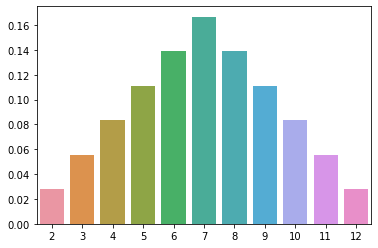

In [2]:
x = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
p = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36])

pdt = pd.DataFrame({'x':x, 'p':p})
print(pdt)
sns.barplot(data= pdt, x= x, y= p) #shape like a normal distribution, kde plot would be appropiate

b. Obtain the mean and standard deviation for this population.

In [3]:
print(pdt['x'].mean()) # mean
print(pdt['x'].std()) #std

7.0
3.3166247903554


Now we are going to take samples from this population to construct a data set with the mean of each sample. This is called a *sampling distribution for the mean* simply because means are being recorded.

#### **Problem 2**

a. Create a function `sampler` that takes a distribution/population `d`, a sample size parameter `k`, and a number of samples `n` to produce a data structure with the means of every sample. 
The function must return the mean and standard deviation (standard error) for the sampling distribution. Additionally, make the fuction display a histogram of the generated data.



In [4]:
def sampler(d: 'the population', k: 'size of each sample', n: 'number of samples'):
    '''Generate a sampling distribution of the mean from population,
    produce a histogram, and return mean, and standard error.
    '''
    rand_ints = []
    means = []
    t = pd.DataFrame()
    
    for x in range(0, n):
        for i in range(0, k):
            rand_ints.append(random.randint(0, d.shape[0] - 1))
        t = d.iloc[rand_ints, :]
        means.append(t['x'].mean())
        rand_ints.clear()
        t = t.iloc[0:0]

    sampling_dist = pd.DataFrame({'m': means})
    
    sns.histplot(data= sampling_dist, x= 'm', kde= True)
    plt.xlabel("Mean")
    
    return "Mean: {}, Standard Error: {}".format(sampling_dist.mean(), sampling_dist.std())

b. Use the `sampler` function from part (a) with the population from Problem 1 for multiple pairs `(k,n)`. For example choose `k` in `[1,5,10,20,30,50,100]` and `n` in `[10,25,50,100,1_000,10_000]`, etc. What is the shape of the sampling distributions for the means?  How do the means and standard error compare to the mean and standard error of the original population?

'Mean: m    7.133333\ndtype: float64, Standard Error: m    1.86488\ndtype: float64'

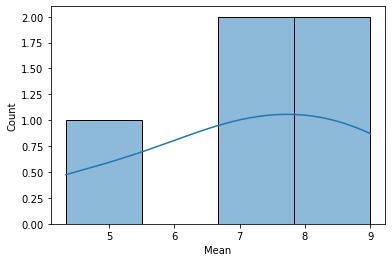

In [5]:
sampler(pdt, 3, 5)

#### **Problem 3**
a. Use `sampler` with at least two other distributions of your choice, e.g. [the distribution from Problem 1 in mini-project 2](https://github.com/cpaniaguam/CSC104/blob/main/CSC104MiniProject2.ipynb), or some other distribution (see [here](https://docs.scipy.org/doc/scipy/reference/stats.html).)

## DISTRIBUTION FROM PROBLEM 1

In [6]:
S = [('J', '♠'), ('Q', '♠'), ('K', '♠'), ('A', '♠')]
F = [] #permutations that have 1, 2, 4 cards fixed
F_dot = [] #permutations that have 0 cards fixed

In [7]:
import itertools
BS = list(itertools.permutations(S))
print(BS,'\n' ,len(BS))

[(('J', '♠'), ('Q', '♠'), ('K', '♠'), ('A', '♠')), (('J', '♠'), ('Q', '♠'), ('A', '♠'), ('K', '♠')), (('J', '♠'), ('K', '♠'), ('Q', '♠'), ('A', '♠')), (('J', '♠'), ('K', '♠'), ('A', '♠'), ('Q', '♠')), (('J', '♠'), ('A', '♠'), ('Q', '♠'), ('K', '♠')), (('J', '♠'), ('A', '♠'), ('K', '♠'), ('Q', '♠')), (('Q', '♠'), ('J', '♠'), ('K', '♠'), ('A', '♠')), (('Q', '♠'), ('J', '♠'), ('A', '♠'), ('K', '♠')), (('Q', '♠'), ('K', '♠'), ('J', '♠'), ('A', '♠')), (('Q', '♠'), ('K', '♠'), ('A', '♠'), ('J', '♠')), (('Q', '♠'), ('A', '♠'), ('J', '♠'), ('K', '♠')), (('Q', '♠'), ('A', '♠'), ('K', '♠'), ('J', '♠')), (('K', '♠'), ('J', '♠'), ('Q', '♠'), ('A', '♠')), (('K', '♠'), ('J', '♠'), ('A', '♠'), ('Q', '♠')), (('K', '♠'), ('Q', '♠'), ('J', '♠'), ('A', '♠')), (('K', '♠'), ('Q', '♠'), ('A', '♠'), ('J', '♠')), (('K', '♠'), ('A', '♠'), ('J', '♠'), ('Q', '♠')), (('K', '♠'), ('A', '♠'), ('Q', '♠'), ('J', '♠')), (('A', '♠'), ('J', '♠'), ('Q', '♠'), ('K', '♠')), (('A', '♠'), ('J', '♠'), ('K', '♠'), ('Q', '♠')),

In [8]:
for perm in BS:
    for card in range(0,4):
        if perm[card] == S[card]:
            F.append(perm)
            break
            
for perm in BS:
    if perm not in F:
        F_dot.append(perm)

In [9]:
numbers_dot = [0 for i in range(len((F_dot)))]

In [10]:
numbers = []

In [11]:
count = 0
count_temp = 0
for row in F:
    for i in range(0,4):
        if row[i] == S[i]:
            count_temp += 1
    if count_temp != count:
        count += count_temp
    else:
        numbers.append(0)
    numbers.append(count)
    count = 0
    count_temp = 0

In [12]:
unique_F = dict(zip(F, numbers))

In [13]:
unique_F_dot = dict(zip(F_dot, numbers_dot))

In [14]:
unique_F.update(unique_F_dot)

In [15]:
from scipy.stats import rv_discrete

# list containing the outcomes in the sample space
x = [0, 1, 2, 4]

# list containing the probabilities for each outcome
p = [numbers_dot.count(0)/len(BS), numbers.count(1)/len(BS), numbers.count(2)/len(BS), numbers.count(4)/len(BS)]

c = [numbers_dot.count(0),numbers.count(1), numbers.count(2), numbers.count(4)]

discvar = rv_discrete(values=(x,p))

In [16]:
df1 = pd.DataFrame(data= {'x' : x, 'p' : p, 'c': c})

'Mean: m    1.866667\ndtype: float64, Standard Error: m    0.649786\ndtype: float64'

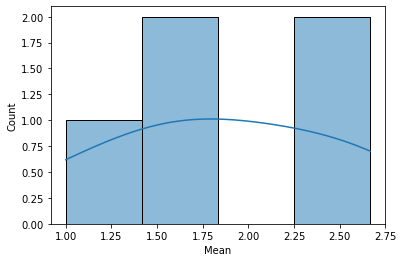

In [17]:
sampler(df1, 3, 5)

## GAMMA DISTRIBUTION

In [21]:
from scipy.stats import gamma
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
gamma_x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
gamma_x

array([0.14633935, 0.21172701, 0.27711468, 0.34250235, 0.40789001,
       0.47327768, 0.53866535, 0.60405301, 0.66944068, 0.73482835,
       0.80021601, 0.86560368, 0.93099135, 0.99637901, 1.06176668,
       1.12715435, 1.19254201, 1.25792968, 1.32331735, 1.38870501,
       1.45409268, 1.51948035, 1.58486801, 1.65025568, 1.71564335,
       1.78103101, 1.84641868, 1.91180635, 1.97719401, 2.04258168,
       2.10796935, 2.17335701, 2.23874468, 2.30413235, 2.36952001,
       2.43490768, 2.50029535, 2.56568301, 2.63107068, 2.69645835,
       2.76184601, 2.82723368, 2.89262135, 2.95800901, 3.02339668,
       3.08878435, 3.15417201, 3.21955968, 3.28494735, 3.35033501,
       3.41572268, 3.48111035, 3.54649801, 3.61188568, 3.67727335,
       3.74266101, 3.80804868, 3.87343635, 3.93882401, 4.00421168,
       4.06959935, 4.13498701, 4.20037468, 4.26576235, 4.33115001,
       4.39653768, 4.46192535, 4.52731301, 4.59270068, 4.65808835,
       4.72347601, 4.78886368, 4.85425135, 4.91963901, 4.98502

In [22]:
df2 = pd.DataFrame({'x':gamma_x})

'Mean: m    3.716506\ndtype: float64, Standard Error: m    1.354848\ndtype: float64'

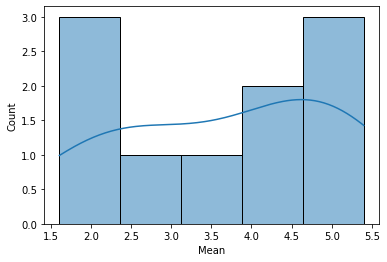

In [24]:
sampler(df2, 3, 10)